In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import LabelEncoder

## Exploratory Data Analysis (EDA): 
Let's perform an EDA to understand the distribution, relationships, and outliers in The data.

### Read the second dataset: 

In [3]:
second_df = pd.read_csv("data2/property_prices.csv")

This is it:

In [4]:
second_df

,Район,Едностайни - цена,Едностайни - €/кв.м,Двустайни - цена,Двустайни - €/кв.м,Тристайни - цена,Тристайни - €/кв.м,Общо - €/кв.м,Дата
0,7-ми 11-ти километър,NaN,NaN,145 502,1 675,189 050,1 756,1 745,13.8.2024
1,Банишора,49 138,1 134,104 500,1 691,142 310,1 503,1 611,13.8.2024
2,Белите брези,38 000,826,82 365,1 157,115 805,1 085,1 157,13.8.2024
3,Бенковски,NaN,NaN,85 262,1 511,118 750,1 250,1 351,13.8.2024
4,Борово,49 400,1 045,89 774,1 222,138 890,1 426,1 232,13.8.2024
...,...,...,...,...,...,...,...,...,...
1745,с. Лозен,41 956,762,53 018,762,89 849,834,762,11.1.2022
1746,с. Мировяне,NaN,NaN,47 500,863,NaN,NaN,863,11.1.2022
1747,с. Мърчаево,NaN,NaN,26 600,266,35 862,297,297,11.1.2022
1748,с. Панчарево,NaN,NaN,76 660,963,131 779,1 132,1 173,11.1.2022


#### Take a closer look at the dataset:

In [5]:
second_df.shape

(1750, 9)

It has 1750 observations and 9 features.

In [6]:
second_df.describe().T

,count,unique,top,freq
Район,1750,160,7-ми 11-ти километър,12
Едностайни - цена,1305,595,49 400,40
Едностайни - €/кв.м,1305,632,1 176,20
Двустайни - цена,1614,964,66 500,34
Двустайни - €/кв.м,1614,818,1 425,17
Тристайни - цена,1636,984,114 000,29
Тристайни - €/кв.м,1636,839,1 254,26
Общо - €/кв.м,1750,886,950,23
Дата,1750,12,23.4.2024,150


In [7]:
second_df.columns

Index(['Район', 'Едностайни - цена', 'Едностайни - €/кв.м', 'Двустайни - цена',
       'Двустайни - €/кв.м', 'Тристайни - цена', 'Тристайни - €/кв.м',
       'Общо - €/кв.м', 'Дата'],
      dtype='object')

Let's normalize the titles like convert the column names from Bulgarian to English:

In [8]:
# Rename columns in second_df
second_df = second_df.rename(columns={
    'Район': 'region',
    'Едностайни - цена': 'one_bed_price',
    'Едностайни - €/кв.м': 'one_bed_eur_per_sqm',
    'Двустайни - цена': 'two_bed_price',
    'Двустайни - €/кв.м': 'two_bed_eur_per_sqm',
    'Тристайни - цена': 'three_bed_price',
    'Тристайни - €/кв.м': 'three_bed_eur_per_sqm',
    'Общо - €/кв.м': 'overall_eur_per_sqm',
    'Дата': 'date'
})

second_df.head()

,region,one_bed_price,one_bed_eur_per_sqm,two_bed_price,two_bed_eur_per_sqm,three_bed_price,three_bed_eur_per_sqm,overall_eur_per_sqm,date
0,7-ми 11-ти километър,NaN,NaN,145 502,1 675,189 050,1 756,1 745,13.8.2024
1,Банишора,49 138,1 134,104 500,1 691,142 310,1 503,1 611,13.8.2024
2,Белите брези,38 000,826,82 365,1 157,115 805,1 085,1 157,13.8.2024
3,Бенковски,NaN,NaN,85 262,1 511,118 750,1 250,1 351,13.8.2024
4,Борово,49 400,1 045,89 774,1 222,138 890,1 426,1 232,13.8.2024


In [9]:
second_df.dtypes

region                   object
one_bed_price            object
one_bed_eur_per_sqm      object
two_bed_price            object
two_bed_eur_per_sqm      object
three_bed_price          object
three_bed_eur_per_sqm    object
overall_eur_per_sqm      object
date                     object
dtype: object

How we see in this dataset we have NaN values. 

First, we'll want to convert the columns containing numerical data from object (string) to appropriate numerical types (e.g., float). This conversion is necessary for performing any numerical operations or analysis. And next we will fill the NaN values with the median.

In [10]:
numeric_columns = [
    'one_bed_price', 
    'one_bed_eur_per_sqm', 
    'two_bed_price', 
    'two_bed_eur_per_sqm', 
    'three_bed_price', 
    'three_bed_eur_per_sqm', 
    'overall_eur_per_sqm'
]

def convert_dtypes(df, numeric_columns):
    for col in df:
        if col in numeric_columns:
            df[col] = df[col].str.replace(r'\D', '', regex=True)
            df[col] = pd.to_numeric(df[col], errors='coerce')

            median_price = df[col].median()

            df[col].fillna(round(median_price, 0), inplace=True)
            
        if col == 'Дата':
            df[col] = pd.to_datetime(df[col], dayfirst=True)
    return df 

second_df = convert_dtypes(second_df, numeric_columns)

In [11]:
second_df

,region,one_bed_price,one_bed_eur_per_sqm,two_bed_price,two_bed_eur_per_sqm,three_bed_price,three_bed_eur_per_sqm,overall_eur_per_sqm,date
0,7-ми 11-ти километър,52686.0,1176.0,145502.0,1675.0,189050.0,1756.0,1745,13.8.2024
1,Банишора,49138.0,1134.0,104500.0,1691.0,142310.0,1503.0,1611,13.8.2024
2,Белите брези,38000.0,826.0,82365.0,1157.0,115805.0,1085.0,1157,13.8.2024
3,Бенковски,52686.0,1176.0,85262.0,1511.0,118750.0,1250.0,1351,13.8.2024
4,Борово,49400.0,1045.0,89774.0,1222.0,138890.0,1426.0,1232,13.8.2024
...,...,...,...,...,...,...,...,...,...
1745,с. Лозен,41956.0,762.0,53018.0,762.0,89849.0,834.0,762,11.1.2022
1746,с. Мировяне,52686.0,1176.0,47500.0,863.0,134900.0,1330.0,863,11.1.2022
1747,с. Мърчаево,52686.0,1176.0,26600.0,266.0,35862.0,297.0,297,11.1.2022
1748,с. Панчарево,52686.0,1176.0,76660.0,963.0,131779.0,1132.0,1173,11.1.2022


Now we see the prices are filled and formated.

Check the data types again:

In [12]:
second_df.dtypes

region                    object
one_bed_price            float64
one_bed_eur_per_sqm      float64
two_bed_price            float64
two_bed_eur_per_sqm      float64
three_bed_price          float64
three_bed_eur_per_sqm    float64
overall_eur_per_sqm        int64
date                      object
dtype: object

Covert the "date" column in the correct data type:

In [13]:
second_df['date'] = pd.to_datetime(second_df['date'], format='%d.%m.%Y')

Check the format of the "Дата" column:

In [14]:
second_df["date"]

0      2024-08-13
1      2024-08-13
2      2024-08-13
3      2024-08-13
4      2024-08-13
          ...    
1745   2022-01-11
1746   2022-01-11
1747   2022-01-11
1748   2022-01-11
1749   2022-01-11
Name: date, Length: 1750, dtype: datetime64[ns]

In [15]:
second_df.isna().sum()

region                   0
one_bed_price            0
one_bed_eur_per_sqm      0
two_bed_price            0
two_bed_eur_per_sqm      0
three_bed_price          0
three_bed_eur_per_sqm    0
overall_eur_per_sqm      0
date                     0
dtype: int64

All NaNs have been successfully replaced.

### Let's plot the prices over time for each apartment type:

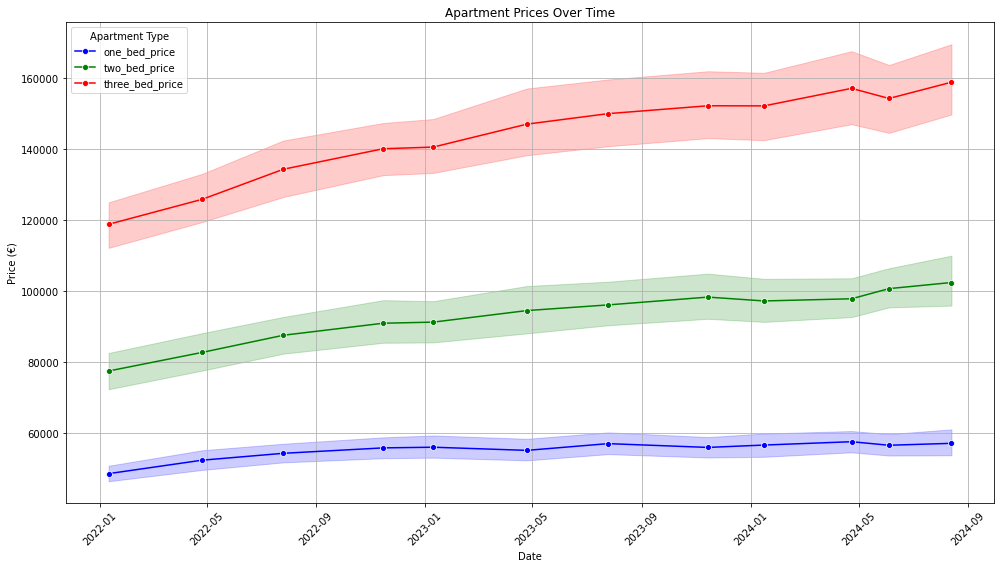

In [16]:
plt.figure(figsize=(14, 8))

# Plot the prices over time for each type of apartment
sns.lineplot(x='date', y='one_bed_price', data=second_df, marker='o', label='one_bed_price', color='blue')
sns.lineplot(x='date', y='two_bed_price', data=second_df, marker='o', label='two_bed_price', color='green')
sns.lineplot(x='date', y='three_bed_price', data=second_df, marker='o', label='three_bed_price', color='red')

plt.title('Apartment Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (€)')
plt.legend(title='Apartment Type')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

#### Another plot:

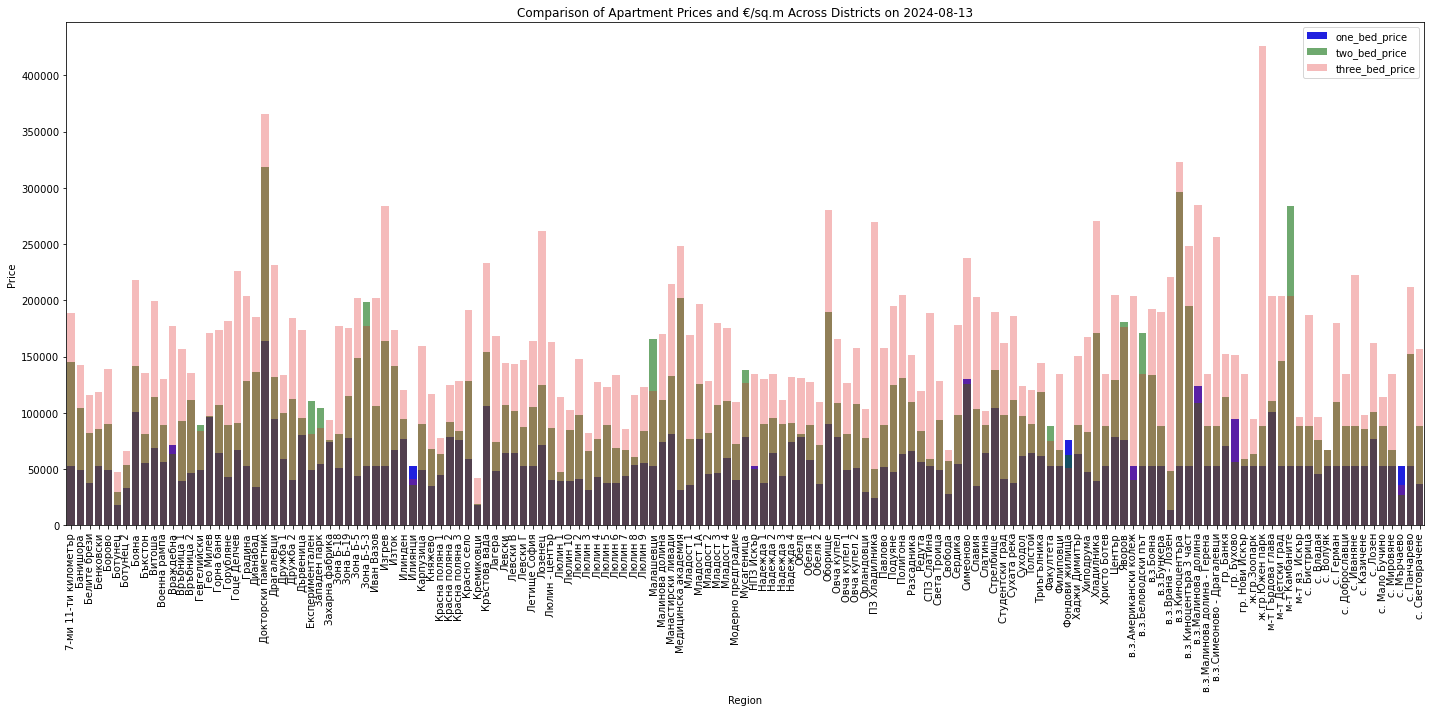

In [17]:
# Filter data by a specific date 
date_filter = '2024-08-13'
filtered_df = second_df[second_df['date'] == date_filter]

plt.figure(figsize=(20, 10))

# Create bar plot for the prices
sns.barplot(x='region', y='one_bed_price', data=filtered_df, color='blue', label='one_bed_price')
sns.barplot(x='region', y='two_bed_price', data=filtered_df, color='green', label='two_bed_price', alpha=0.6)
sns.barplot(x='region', y='three_bed_price', data=filtered_df, color='red', label='three_bed_price', alpha=0.3)

plt.xticks(rotation=90)
plt.title(f'Comparison of Apartment Prices and €/sq.m Across Districts on {date_filter}')
plt.ylabel('Price')
plt.xlabel('Region')
plt.legend(loc='upper right')
plt.tight_layout()

plt.show()

How many unique regions we have in the dataset:

In [18]:
len(second_df['region'].unique())

160

And which are thay:

In [19]:
second_df['region'].unique()

array(['7-ми 11-ти километър', 'Банишора', 'Белите брези', 'Бенковски',
       'Борово', 'Ботунец', 'Ботунец 2', 'Бояна', 'Бъкстон', 'Витоша',
       'Военна рампа', 'Враждебна', 'Връбница 1', 'Връбница 2',
       'Гевгелийски', 'Гео Милев', 'Горна баня', 'Горубляне',
       'Гоце Делчев', 'Градина', 'Дианабад', 'Докторски паметник',
       'Драгалевци', 'Дружба 1', 'Дружба 2', 'Дървеница',
       'Експериментален', 'Западен парк', 'Захарна фабрика', 'Зона Б-18',
       'Зона Б-19', 'Зона Б-5', 'Зона Б-5-3', 'Иван Вазов', 'Изгрев',
       'Изток', 'Илинден', 'Илиянци', 'Карпузица', 'Княжево',
       'Красна поляна 1', 'Красна поляна 2', 'Красна поляна 3',
       'Красно село', 'Кремиковци', 'Кръстова вада', 'Лагера', 'Левски',
       'Левски В', 'Левски Г', 'Летище София', 'Лозенец',
       'Люлин - център', 'Люлин 1', 'Люлин 10', 'Люлин 2', 'Люлин 3',
       'Люлин 4', 'Люлин 5', 'Люлин 6', 'Люлин 7', 'Люлин 8', 'Люлин 9',
       'Малашевци', 'Малинова долина', 'Манастирски ливади',
 

In [20]:
second_df['one_bed_price'].max()

180500.0

In [21]:
top_5_rows = second_df.nlargest(5, 'one_bed_price')  
top_5_rows

,region,one_bed_price,one_bed_eur_per_sqm,two_bed_price,two_bed_eur_per_sqm,three_bed_price,three_bed_eur_per_sqm,overall_eur_per_sqm,date
168,Докторски паметник,180500.0,4512.0,323000.0,3867.0,394250.0,3657.0,3779,2024-06-04
316,Докторски паметник,180500.0,4512.0,280250.0,3932.0,394250.0,3562.0,3895,2024-04-23
21,Докторски паметник,163400.0,4085.0,318250.0,4432.0,365750.0,3602.0,3735,2024-08-13
559,Яворов,152000.0,3800.0,165300.0,2405.0,204250.0,2389.0,2406,2024-01-16
1344,Докторски паметник,142500.0,4750.0,242231.0,4115.0,285000.0,3585.0,3762,2022-07-26


In [22]:
from scipy import stats

second_df['z_score'] = stats.zscore(second_df['one_bed_eur_per_sqm'])
outliers = second_df[second_df['z_score'].abs() > 3]
outliers

,region,one_bed_price,one_bed_eur_per_sqm,two_bed_price,two_bed_eur_per_sqm,three_bed_price,three_bed_eur_per_sqm,overall_eur_per_sqm,date,z_score
21,Докторски паметник,163400.0,4085.0,318250.0,4432.0,365750.0,3602.0,3735,2024-08-13,6.817904
35,Изток,66499.0,2501.0,142025.0,2040.0,173850.0,1757.0,1957,2024-08-13,3.041322
100,Стрелбище,104500.0,2548.0,137750.0,1979.0,190000.0,2058.0,2014,2024-08-13,3.153380
168,Докторски паметник,180500.0,4512.0,323000.0,3867.0,394250.0,3657.0,3779,2024-06-04,7.835960
316,Докторски паметник,180500.0,4512.0,280250.0,3932.0,394250.0,3562.0,3895,2024-04-23,7.835960
328,Иван Вазов,94981.0,3166.0,85500.0,1285.0,222775.0,2138.0,2760,2024-04-23,4.626819
395,Стрелбище,118750.0,2548.0,109250.0,1521.0,189002.0,1884.0,1801,2024-04-23,3.153380
460,Гео Милев,114000.0,2698.0,96425.0,1344.0,166250.0,1687.0,1397,2024-01-16,3.511011
559,Яворов,152000.0,3800.0,165300.0,2405.0,204250.0,2389.0,2406,2024-01-16,6.138406
603,Гео Милев,114000.0,2850.0,94525.0,1300.0,152000.0,1474.0,1397,2023-11-14,3.873410


#### Remove outliers:

In [23]:
second_df = second_df[second_df['z_score'].abs() <= 3].copy()

In [24]:
second_df.corr()

,one_bed_price,one_bed_eur_per_sqm,two_bed_price,two_bed_eur_per_sqm,three_bed_price,three_bed_eur_per_sqm,overall_eur_per_sqm,z_score
one_bed_price,1.000000,0.860349,0.290239,0.345457,0.267186,0.308055,0.357509,0.860349
one_bed_eur_per_sqm,0.860349,1.000000,0.331230,0.404177,0.275879,0.352095,0.409974,1.000000
two_bed_price,0.290239,0.331230,1.000000,0.856650,0.708855,0.661014,0.743100,0.331230
two_bed_eur_per_sqm,0.345457,0.404177,0.856650,1.000000,0.631367,0.726093,0.838216,0.404177
three_bed_price,0.267186,0.275879,0.708855,0.631367,1.000000,0.880030,0.790895,0.275879
three_bed_eur_per_sqm,0.308055,0.352095,0.661014,0.726093,0.880030,1.000000,0.883036,0.352095
overall_eur_per_sqm,0.357509,0.409974,0.743100,0.838216,0.790895,0.883036,1.000000,0.409974
z_score,0.860349,1.000000,0.331230,0.404177,0.275879,0.352095,0.409974,1.000000


<AxesSubplot:>

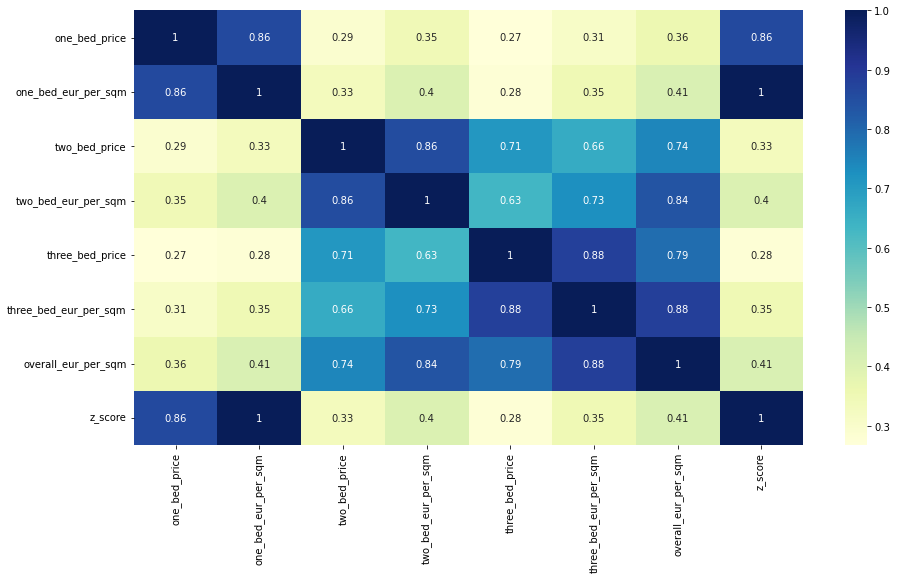

In [25]:
plt.figure(figsize=(15,8))
sns.heatmap(second_df.corr(), annot=True, cmap="YlGnBu")

## Train the model

In [26]:
second_df['year'] = second_df['date'].dt.year
second_df['month'] = second_df['date'].dt.month
second_df.drop(columns=["date", "z_score"], axis=1, inplace=True)

In [27]:
# # Feature engineering
# second_df['month_sin'] = np.sin(2 * np.pi * second_df['month'] / 12.0)
# second_df['month_cos'] = np.cos(2 * np.pi * second_df['month'] / 12.0)

In [61]:
X = second_df.drop(["one_bed_eur_per_sqm"], axis=1)
y = second_df["one_bed_eur_per_sqm"]

In [62]:
label_encoder = LabelEncoder()
X['region'] = label_encoder.fit_transform(X['region'])

# one_hot_encoder = OneHotEncoder(sparse=False)
# X['region'] = one_hot_encoder.fit_transform(X[['region']])

In [63]:
X

,region,one_bed_price,two_bed_price,two_bed_eur_per_sqm,three_bed_price,three_bed_eur_per_sqm,overall_eur_per_sqm,year,month
0,0,52686.0,145502.0,1675.0,189050.0,1756.0,1745,2024,8
1,1,49138.0,104500.0,1691.0,142310.0,1503.0,1611,2024,8
2,2,38000.0,82365.0,1157.0,115805.0,1085.0,1157,2024,8
3,3,52686.0,85262.0,1511.0,118750.0,1250.0,1351,2024,8
4,4,49400.0,89774.0,1222.0,138890.0,1426.0,1232,2024,8
...,...,...,...,...,...,...,...,...,...
1745,152,41956.0,53018.0,762.0,89849.0,834.0,762,2022,1
1746,154,52686.0,47500.0,863.0,134900.0,1330.0,863,2022,1
1747,156,52686.0,26600.0,266.0,35862.0,297.0,297,2022,1
1748,157,52686.0,76660.0,963.0,131779.0,1132.0,1173,2022,1


In [31]:
from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [79]:
y_train

836     1144.0
1532    1238.0
817     1463.0
971     1520.0
1332    1200.0
         ...  
1538    1176.0
59       872.0
60       972.0
72      1045.0
242     1963.0
Name: one_bed_eur_per_sqm, Length: 1380, dtype: float64

In [80]:
model = LinearRegression()

In [81]:
model.fit(X_train, y_train)

LinearRegression()

In [82]:
y_pred = model.predict(X_test)

In [37]:
# y_pred

## Evaluate the model

In [83]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Absolute Error (MAE): 110.1986895494586
Mean Squared Error (MSE): 25425.88520006356
Root Mean Squared Error (RMSE): 159.4549629207682


In [39]:
model.coef_

array([-6.90928751e+01, -4.27404364e+01,  2.56494630e+02,  1.12698272e+02,
       -2.75344139e+01, -5.35594522e+02,  2.96378233e-01,  5.31895588e+00,
        3.79206031e+00])

In [40]:
cdf = pd.DataFrame(model.coef_, X.columns, columns=['Coef'])
cdf

,Coef
region,-69.092875
one_bed_price,-42.740436
two_bed_price,256.494630
two_bed_eur_per_sqm,112.698272
three_bed_price,-27.534414
three_bed_eur_per_sqm,-535.594522
overall_eur_per_sqm,0.296378
year,5.318956
month,3.792060


In [41]:
model.intercept_

-9976.276119296237

## Use RandomForest model

#### Train for One bedroom apartments

In [42]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mse_rf ** 0.5

print(f'Random Forest - Mean Absolute Error (MAE): {mae_rf}')
print(f'Random Forest - Mean Squared Error (MSE): {mse_rf}')
print(f'Random Forest - Root Mean Squared Error (RMSE): {rmse_rf}')

Random Forest - Mean Absolute Error (MAE): 268.03546196227285
Random Forest - Mean Squared Error (MSE): 132519.14153698736
Random Forest - Root Mean Squared Error (RMSE): 364.03178643765074


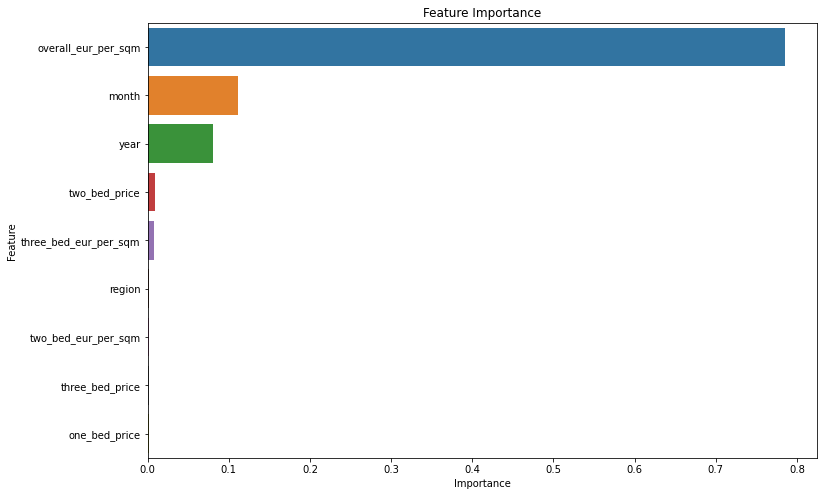

In [43]:
importances = rf_model.feature_importances_
features = X.columns

# Create a DataFrame for visualization
feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importance')
plt.show()

__We see this model has better performance__. It shows lower error metrics compared to the Linear Regression model.

#### Train for Two bedrom apartments

In [44]:
X_two = second_df.drop(["two_bed_eur_per_sqm"], axis=1)
y_two = second_df["two_bed_eur_per_sqm"]

In [45]:
label_encoder_two = LabelEncoder()
X_two['region'] = label_encoder_two.fit_transform(X_two['region'])

In [46]:
X_train_two, X_test_two, y_train_two, y_test_two = train_test_split(X_two, y_two, test_size=0.2)
rf_model_two = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model_two.fit(X_train_two, y_train_two)

y_pred_rf_two = rf_model_two.predict(X_test_two)

In [47]:
# Evaluate the model
mae_rf = mean_absolute_error(y_test_two, y_pred_rf_two)
mse_rf = mean_squared_error(y_test_two, y_pred_rf_two)
rmse_rf = mse_rf ** 0.5

print(f'Random Forest - Mean Absolute Error (MAE): {mae_rf}')
print(f'Random Forest - Mean Squared Error (MSE): {mse_rf}')
print(f'Random Forest - Root Mean Squared Error (RMSE): {rmse_rf}')

Random Forest - Mean Absolute Error (MAE): 55.095536231884054
Random Forest - Mean Squared Error (MSE): 7911.274824927536
Random Forest - Root Mean Squared Error (RMSE): 88.94534740461435


#### Train for Three bedroom apartments

In [48]:
X_three = second_df.drop(["three_bed_eur_per_sqm"], axis=1)
y_three = second_df["three_bed_eur_per_sqm"]

label_encoder_three = LabelEncoder()
X_three['region'] = label_encoder_three.fit_transform(X_three['region'])

# one_hot_encoder = OneHotEncoder(sparse=False)
# X_three['region'] = one_hot_encoder.fit_transform(X_three[['region']])

In [49]:
X_train_three, X_test_three, y_train_three, y_test_three = train_test_split(X_three, y_three, test_size=0.2)
rf_model_three = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model_three.fit(X_train_three, y_train_three)

y_pred_rf_three = rf_model_three.predict(X_test_three)

In [50]:
# Evaluate the model
mae_rf = mean_absolute_error(y_test_three, y_pred_rf_three)
mse_rf = mean_squared_error(y_test_three, y_pred_rf_three)
rmse_rf = mse_rf ** 0.5

print(f'Random Forest - Mean Absolute Error (MAE): {mae_rf}')
print(f'Random Forest - Mean Squared Error (MSE): {mse_rf}')
print(f'Random Forest - Root Mean Squared Error (RMSE): {rmse_rf}')

Random Forest - Mean Absolute Error (MAE): 54.35907246376812
Random Forest - Mean Squared Error (MSE): 7991.749626666667
Random Forest - Root Mean Squared Error (RMSE): 89.39658621371773


## Make predictions

In [51]:
X_three

,region,one_bed_price,one_bed_eur_per_sqm,two_bed_price,two_bed_eur_per_sqm,three_bed_price,overall_eur_per_sqm,year,month
0,0,52686.0,1176.0,145502.0,1675.0,189050.0,1745,2024,8
1,1,49138.0,1134.0,104500.0,1691.0,142310.0,1611,2024,8
2,2,38000.0,826.0,82365.0,1157.0,115805.0,1157,2024,8
3,3,52686.0,1176.0,85262.0,1511.0,118750.0,1351,2024,8
4,4,49400.0,1045.0,89774.0,1222.0,138890.0,1232,2024,8
...,...,...,...,...,...,...,...,...,...
1745,152,41956.0,762.0,53018.0,762.0,89849.0,762,2022,1
1746,154,52686.0,1176.0,47500.0,863.0,134900.0,863,2022,1
1747,156,52686.0,1176.0,26600.0,266.0,35862.0,297,2022,1
1748,157,52686.0,1176.0,76660.0,963.0,131779.0,1173,2022,1


In [52]:
# Define the future periods for the next year
future_dates = pd.date_range(start='2025-01-01', periods=12, freq='M')

# Create a DataFrame with these future periods
future_df = pd.DataFrame({
    'region': [0]*12,  # Replace with appropriate values
    'one_bed_price': [100000]*12,  # Replace with appropriate values or estimates
    'one_bed_eur_per_sqm': [1500]*12,
    'two_bed_price': [200000]*12,
    'two_bed_eur_per_sqm': [1500]*12,
    'three_bed_price': [300000]*12,
    'overall_eur_per_sqm': [1600]*12,
    'year': future_dates.year,
    'month': future_dates.month
})


In [53]:
# Example: Inspect columns of the DataFrame used for training
X_train_three.columns


Index(['region', 'one_bed_price', 'one_bed_eur_per_sqm', 'two_bed_price',
       'two_bed_eur_per_sqm', 'three_bed_price', 'overall_eur_per_sqm', 'year',
       'month'],
      dtype='object')

In [54]:
# # Load your trained model (if not already in memory)
# # model = joblib.load('path_to_your_trained_model.pkl')  # if saved to a file

# # Make predictions
# future_predictions = rf_model_three.predict(future_df)

# # Add predictions to your DataFrame
# future_df['predicted_one_bed_eur_per_sqm'] = future_predictions

# print(future_df)


In [55]:
# # Decode the encoded labels back to their original strings
# decoded_regions = label_encoder_region.inverse_transform(future_data['Район'])
# decoded_apartment_types = label_encoder_apartment_type.inverse_transform(future_data['Тип Апартамент'])

# # Display predictions with original labels
# for i, prediction in enumerate(future_predictions):
#     region_label = decoded_regions[i]
#     apartment_type_label = decoded_apartment_types[i]
#     print(f"Prediction for {region_label} - {apartment_type_label}: {prediction:.2f} per square meter")

In [56]:
# # Example: Predicting for 2025 with specific assumptions for features
# future_data = {
#     'Район': label_encode.transform(['Банишора', 'Белите Брези']),  # Encode regions
#     'Тип Апартамент': label_encoder_apartment_type.transform(['Двустаен апартамент', 'Тристаен апартамент']),  # Encode apartment types
#     'Year': [2025] * 2,  # Assuming 2 predictions for example purposes
#     'Month': [1, 1],  # Predicting for January 2025
# }

# # Convert to DataFrame
# future_X = pd.DataFrame(future_data)

# # Make predictions
# future_predictions = model.predict(future_X)

In [57]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# label_encoder_three = LabelEncoder()
# second_df['region'] = label_encoder_three.fit_transform(second_df['region'])

# X = second_df[['region', 'month', 'year']]
# y = second_df['one_bed_eur_per_sqm']

# model = RandomForestRegressor()

# Encoding the 'region' column using OneHotEncoder within ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('region', OneHotEncoder(), ['region']),
        # Include other preprocessing steps if needed
    ],
    remainder='passthrough'  # Keeps other columns unchanged
)

# Define the features and target variable
X = second_df[['region', 'month', 'year']]
y = second_df['one_bed_eur_per_sqm']

# Create a pipeline with preprocessing and model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
# model.fit(X_train, y_train)

# Train the model
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

In [58]:
# y_pred

In [59]:
# Example new data
new_data = pd.DataFrame({
    'region': [18],  # Example region ID
    'month': [1],   # Example month
    'year': [2025]  # Example year
})

# Predict the price per square meter
predicted_price_per_sqm = pipeline.predict(new_data)
print(predicted_price_per_sqm)

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')